# GAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [2]:
RUN_ID = '0015'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari('elephant')

## architecture

In [4]:
x_train.shape

(80000, 28, 28, 1)

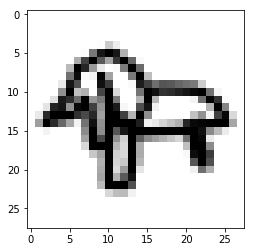

In [5]:
plt.imshow(x_train[0,:,:,0], cmap = 'gray_r')

In [6]:
np.min(x_train[0])

-1.0

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008 #0.0002 #
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,1]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004 #0.0002 #
        , z_dim = 100
        )

gan.save(RUN_FOLDER)

In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 14, 14, 128)       204928    
__________

## training

In [11]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
)



0 [D loss: 0.701534] [D acc: 0.500000] [G loss: 0.134240] [G acc: 1.000000]
1 [D loss: 1.598336] [D acc: 0.500000] [G loss: 0.677296] [G acc: 1.000000]
2 [D loss: 0.692099] [D acc: 0.500000] [G loss: 0.676456] [G acc: 1.000000]
3 [D loss: 0.692772] [D acc: 0.500000] [G loss: 0.675559] [G acc: 1.000000]
4 [D loss: 0.691367] [D acc: 0.500000] [G loss: 0.678061] [G acc: 1.000000]
5 [D loss: 0.687769] [D acc: 0.500000] [G loss: 0.681422] [G acc: 0.968750]
6 [D loss: 0.685176] [D acc: 0.503906] [G loss: 0.688807] [G acc: 0.718750]
7 [D loss: 0.681770] [D acc: 0.535156] [G loss: 0.662356] [G acc: 1.000000]
8 [D loss: 0.687236] [D acc: 0.500000] [G loss: 0.646932] [G acc: 1.000000]
9 [D loss: 0.700758] [D acc: 0.500000] [G loss: 0.659628] [G acc: 1.000000]
10 [D loss: 0.689615] [D acc: 0.500000] [G loss: 0.650920] [G acc: 1.000000]
11 [D loss: 0.687853] [D acc: 0.500000] [G loss: 0.638037] [G acc: 1.000000]
12 [D loss: 0.692332] [D acc: 0.500000] [G loss: 0.646178] [G acc: 1.000000]
13 [D los

107 [D loss: 0.800053] [D acc: 0.500000] [G loss: 0.883842] [G acc: 0.000000]
108 [D loss: 0.691589] [D acc: 0.500000] [G loss: 0.771385] [G acc: 0.093750]
109 [D loss: 0.681668] [D acc: 0.566406] [G loss: 0.739733] [G acc: 0.203125]
110 [D loss: 0.667526] [D acc: 0.656250] [G loss: 0.723016] [G acc: 0.335938]
111 [D loss: 0.662891] [D acc: 0.679688] [G loss: 0.723820] [G acc: 0.359375]
112 [D loss: 0.672216] [D acc: 0.570312] [G loss: 0.806318] [G acc: 0.156250]
113 [D loss: 0.662447] [D acc: 0.640625] [G loss: 0.733506] [G acc: 0.351562]
114 [D loss: 0.678794] [D acc: 0.562500] [G loss: 0.968443] [G acc: 0.000000]
115 [D loss: 0.684516] [D acc: 0.542969] [G loss: 0.618449] [G acc: 0.828125]
116 [D loss: 0.676266] [D acc: 0.511719] [G loss: 0.842856] [G acc: 0.054688]
117 [D loss: 0.672420] [D acc: 0.585938] [G loss: 0.660501] [G acc: 0.625000]
118 [D loss: 0.669463] [D acc: 0.613281] [G loss: 0.917926] [G acc: 0.007812]
119 [D loss: 0.678715] [D acc: 0.582031] [G loss: 0.604774] [G a

213 [D loss: 0.618373] [D acc: 0.648438] [G loss: 1.215900] [G acc: 0.015625]
214 [D loss: 0.647003] [D acc: 0.601562] [G loss: 0.451045] [G acc: 0.921875]
215 [D loss: 0.681673] [D acc: 0.562500] [G loss: 1.059582] [G acc: 0.015625]
216 [D loss: 0.687070] [D acc: 0.562500] [G loss: 0.686652] [G acc: 0.554688]
217 [D loss: 0.656964] [D acc: 0.597656] [G loss: 0.828998] [G acc: 0.218750]
218 [D loss: 0.619146] [D acc: 0.710938] [G loss: 0.750460] [G acc: 0.414062]
219 [D loss: 0.655596] [D acc: 0.625000] [G loss: 0.959396] [G acc: 0.093750]
220 [D loss: 0.634079] [D acc: 0.648438] [G loss: 0.652116] [G acc: 0.585938]
221 [D loss: 0.651132] [D acc: 0.621094] [G loss: 1.039486] [G acc: 0.046875]
222 [D loss: 0.650271] [D acc: 0.578125] [G loss: 0.527283] [G acc: 0.843750]
223 [D loss: 0.711089] [D acc: 0.523438] [G loss: 1.135573] [G acc: 0.007812]
224 [D loss: 0.686172] [D acc: 0.539062] [G loss: 0.707064] [G acc: 0.492188]
225 [D loss: 0.640040] [D acc: 0.617188] [G loss: 0.887269] [G a

319 [D loss: 0.623788] [D acc: 0.628906] [G loss: 0.460183] [G acc: 0.859375]
320 [D loss: 0.720128] [D acc: 0.531250] [G loss: 1.388968] [G acc: 0.007812]
321 [D loss: 0.696439] [D acc: 0.542969] [G loss: 0.712122] [G acc: 0.515625]
322 [D loss: 0.607433] [D acc: 0.656250] [G loss: 0.902680] [G acc: 0.250000]
323 [D loss: 0.622641] [D acc: 0.632812] [G loss: 0.836454] [G acc: 0.289062]
324 [D loss: 0.611799] [D acc: 0.656250] [G loss: 0.898619] [G acc: 0.257812]
325 [D loss: 0.587243] [D acc: 0.687500] [G loss: 0.753140] [G acc: 0.445312]
326 [D loss: 0.580315] [D acc: 0.703125] [G loss: 1.111020] [G acc: 0.085938]
327 [D loss: 0.617725] [D acc: 0.660156] [G loss: 0.818911] [G acc: 0.359375]
328 [D loss: 0.576668] [D acc: 0.671875] [G loss: 1.321727] [G acc: 0.023438]
329 [D loss: 0.649420] [D acc: 0.593750] [G loss: 0.553408] [G acc: 0.742188]
330 [D loss: 0.659523] [D acc: 0.593750] [G loss: 1.288012] [G acc: 0.031250]
331 [D loss: 0.661829] [D acc: 0.589844] [G loss: 0.700911] [G a

425 [D loss: 0.583156] [D acc: 0.664062] [G loss: 1.331340] [G acc: 0.062500]
426 [D loss: 0.624245] [D acc: 0.628906] [G loss: 0.678246] [G acc: 0.546875]
427 [D loss: 0.600580] [D acc: 0.632812] [G loss: 1.269971] [G acc: 0.015625]
428 [D loss: 0.627934] [D acc: 0.644531] [G loss: 0.692935] [G acc: 0.539062]
429 [D loss: 0.573440] [D acc: 0.683594] [G loss: 1.126293] [G acc: 0.085938]
430 [D loss: 0.560749] [D acc: 0.707031] [G loss: 0.834039] [G acc: 0.359375]
431 [D loss: 0.580812] [D acc: 0.667969] [G loss: 1.207880] [G acc: 0.101562]
432 [D loss: 0.585182] [D acc: 0.691406] [G loss: 0.556581] [G acc: 0.671875]
433 [D loss: 0.656829] [D acc: 0.605469] [G loss: 1.511319] [G acc: 0.000000]
434 [D loss: 0.721705] [D acc: 0.554688] [G loss: 0.677817] [G acc: 0.546875]
435 [D loss: 0.629277] [D acc: 0.617188] [G loss: 1.006653] [G acc: 0.179688]
436 [D loss: 0.607998] [D acc: 0.679688] [G loss: 0.933210] [G acc: 0.281250]
437 [D loss: 0.582271] [D acc: 0.699219] [G loss: 0.994112] [G a

531 [D loss: 0.626185] [D acc: 0.652344] [G loss: 0.665570] [G acc: 0.593750]
532 [D loss: 0.652562] [D acc: 0.609375] [G loss: 1.534308] [G acc: 0.023438]
533 [D loss: 0.632993] [D acc: 0.625000] [G loss: 0.685710] [G acc: 0.546875]
534 [D loss: 0.640217] [D acc: 0.640625] [G loss: 1.077641] [G acc: 0.164062]
535 [D loss: 0.601811] [D acc: 0.671875] [G loss: 0.915242] [G acc: 0.281250]
536 [D loss: 0.531404] [D acc: 0.769531] [G loss: 1.079855] [G acc: 0.195312]
537 [D loss: 0.550749] [D acc: 0.753906] [G loss: 0.884818] [G acc: 0.351562]
538 [D loss: 0.479409] [D acc: 0.789062] [G loss: 1.401227] [G acc: 0.046875]
539 [D loss: 0.545215] [D acc: 0.726562] [G loss: 0.947258] [G acc: 0.289062]
540 [D loss: 0.506197] [D acc: 0.761719] [G loss: 1.584939] [G acc: 0.062500]
541 [D loss: 0.607481] [D acc: 0.683594] [G loss: 0.581804] [G acc: 0.671875]
542 [D loss: 0.647872] [D acc: 0.648438] [G loss: 1.679256] [G acc: 0.015625]
543 [D loss: 0.666947] [D acc: 0.609375] [G loss: 0.643028] [G a

637 [D loss: 0.535440] [D acc: 0.742188] [G loss: 1.521984] [G acc: 0.015625]
638 [D loss: 0.553223] [D acc: 0.703125] [G loss: 0.786996] [G acc: 0.445312]
639 [D loss: 0.579592] [D acc: 0.683594] [G loss: 1.415549] [G acc: 0.085938]
640 [D loss: 0.588039] [D acc: 0.683594] [G loss: 0.822831] [G acc: 0.375000]
641 [D loss: 0.547997] [D acc: 0.714844] [G loss: 1.435794] [G acc: 0.085938]
642 [D loss: 0.563215] [D acc: 0.714844] [G loss: 0.757896] [G acc: 0.453125]
643 [D loss: 0.613321] [D acc: 0.660156] [G loss: 1.406456] [G acc: 0.054688]
644 [D loss: 0.582744] [D acc: 0.667969] [G loss: 0.703163] [G acc: 0.492188]
645 [D loss: 0.578304] [D acc: 0.675781] [G loss: 1.456939] [G acc: 0.046875]
646 [D loss: 0.576491] [D acc: 0.667969] [G loss: 0.744026] [G acc: 0.500000]
647 [D loss: 0.614047] [D acc: 0.632812] [G loss: 1.225527] [G acc: 0.101562]
648 [D loss: 0.605592] [D acc: 0.687500] [G loss: 0.862189] [G acc: 0.335938]
649 [D loss: 0.579566] [D acc: 0.710938] [G loss: 1.196631] [G a

743 [D loss: 0.510860] [D acc: 0.757812] [G loss: 1.202475] [G acc: 0.171875]
744 [D loss: 0.540702] [D acc: 0.699219] [G loss: 1.093896] [G acc: 0.218750]
745 [D loss: 0.491507] [D acc: 0.765625] [G loss: 1.334984] [G acc: 0.179688]
746 [D loss: 0.547353] [D acc: 0.742188] [G loss: 0.961179] [G acc: 0.320312]
747 [D loss: 0.505491] [D acc: 0.769531] [G loss: 1.739915] [G acc: 0.039062]
748 [D loss: 0.602474] [D acc: 0.675781] [G loss: 0.564268] [G acc: 0.687500]
749 [D loss: 0.689134] [D acc: 0.574219] [G loss: 1.497529] [G acc: 0.039062]
750 [D loss: 0.576133] [D acc: 0.679688] [G loss: 0.826141] [G acc: 0.382812]
751 [D loss: 0.552346] [D acc: 0.722656] [G loss: 1.321478] [G acc: 0.093750]
752 [D loss: 0.523364] [D acc: 0.726562] [G loss: 0.862814] [G acc: 0.390625]
753 [D loss: 0.527650] [D acc: 0.761719] [G loss: 1.101521] [G acc: 0.203125]
754 [D loss: 0.530204] [D acc: 0.730469] [G loss: 1.260773] [G acc: 0.164062]
755 [D loss: 0.553742] [D acc: 0.691406] [G loss: 1.062476] [G a

849 [D loss: 0.624916] [D acc: 0.667969] [G loss: 0.888749] [G acc: 0.343750]
850 [D loss: 0.582049] [D acc: 0.710938] [G loss: 1.147088] [G acc: 0.203125]
851 [D loss: 0.558836] [D acc: 0.707031] [G loss: 1.165813] [G acc: 0.156250]
852 [D loss: 0.497906] [D acc: 0.796875] [G loss: 1.112293] [G acc: 0.187500]
853 [D loss: 0.473528] [D acc: 0.808594] [G loss: 1.265977] [G acc: 0.179688]
854 [D loss: 0.524149] [D acc: 0.765625] [G loss: 1.294122] [G acc: 0.117188]
855 [D loss: 0.528470] [D acc: 0.683594] [G loss: 1.071848] [G acc: 0.289062]
856 [D loss: 0.589208] [D acc: 0.691406] [G loss: 1.429785] [G acc: 0.117188]
857 [D loss: 0.495423] [D acc: 0.746094] [G loss: 0.940057] [G acc: 0.359375]
858 [D loss: 0.604921] [D acc: 0.660156] [G loss: 1.972707] [G acc: 0.015625]
859 [D loss: 0.721129] [D acc: 0.597656] [G loss: 0.684480] [G acc: 0.562500]
860 [D loss: 0.665388] [D acc: 0.597656] [G loss: 1.262942] [G acc: 0.085938]
861 [D loss: 0.584479] [D acc: 0.679688] [G loss: 0.978773] [G a

955 [D loss: 0.506821] [D acc: 0.750000] [G loss: 1.294474] [G acc: 0.156250]
956 [D loss: 0.574256] [D acc: 0.695312] [G loss: 0.985399] [G acc: 0.296875]
957 [D loss: 0.469816] [D acc: 0.796875] [G loss: 1.360988] [G acc: 0.117188]
958 [D loss: 0.470052] [D acc: 0.781250] [G loss: 1.266369] [G acc: 0.203125]
959 [D loss: 0.525798] [D acc: 0.707031] [G loss: 1.230961] [G acc: 0.234375]
960 [D loss: 0.535492] [D acc: 0.726562] [G loss: 1.172941] [G acc: 0.210938]
961 [D loss: 0.487431] [D acc: 0.761719] [G loss: 2.052067] [G acc: 0.031250]
962 [D loss: 0.614990] [D acc: 0.664062] [G loss: 0.507547] [G acc: 0.750000]
963 [D loss: 0.803355] [D acc: 0.585938] [G loss: 1.405712] [G acc: 0.085938]
964 [D loss: 0.612493] [D acc: 0.640625] [G loss: 0.870338] [G acc: 0.421875]
965 [D loss: 0.560059] [D acc: 0.726562] [G loss: 1.169303] [G acc: 0.156250]
966 [D loss: 0.521690] [D acc: 0.714844] [G loss: 1.096796] [G acc: 0.195312]
967 [D loss: 0.542965] [D acc: 0.726562] [G loss: 1.173765] [G a

1060 [D loss: 0.519291] [D acc: 0.718750] [G loss: 1.800378] [G acc: 0.070312]
1061 [D loss: 0.510421] [D acc: 0.722656] [G loss: 0.933839] [G acc: 0.382812]
1062 [D loss: 0.544036] [D acc: 0.710938] [G loss: 1.612724] [G acc: 0.062500]
1063 [D loss: 0.582636] [D acc: 0.691406] [G loss: 0.936687] [G acc: 0.335938]
1064 [D loss: 0.538155] [D acc: 0.710938] [G loss: 1.551934] [G acc: 0.054688]
1065 [D loss: 0.512861] [D acc: 0.753906] [G loss: 1.009134] [G acc: 0.296875]
1066 [D loss: 0.517672] [D acc: 0.714844] [G loss: 1.558798] [G acc: 0.117188]
1067 [D loss: 0.576206] [D acc: 0.703125] [G loss: 0.838961] [G acc: 0.437500]
1068 [D loss: 0.545354] [D acc: 0.726562] [G loss: 1.272980] [G acc: 0.164062]
1069 [D loss: 0.494642] [D acc: 0.761719] [G loss: 1.160807] [G acc: 0.218750]
1070 [D loss: 0.475358] [D acc: 0.777344] [G loss: 1.351381] [G acc: 0.171875]
1071 [D loss: 0.508562] [D acc: 0.773438] [G loss: 1.119861] [G acc: 0.265625]
1072 [D loss: 0.524855] [D acc: 0.734375] [G loss: 1

1164 [D loss: 0.493353] [D acc: 0.777344] [G loss: 1.185856] [G acc: 0.265625]
1165 [D loss: 0.522731] [D acc: 0.718750] [G loss: 1.432462] [G acc: 0.109375]
1166 [D loss: 0.473488] [D acc: 0.781250] [G loss: 1.132032] [G acc: 0.304688]
1167 [D loss: 0.449004] [D acc: 0.812500] [G loss: 1.824825] [G acc: 0.054688]
1168 [D loss: 0.486811] [D acc: 0.781250] [G loss: 0.992885] [G acc: 0.343750]
1169 [D loss: 0.635346] [D acc: 0.695312] [G loss: 2.232758] [G acc: 0.031250]
1170 [D loss: 0.745989] [D acc: 0.601562] [G loss: 0.611760] [G acc: 0.656250]
1171 [D loss: 0.618592] [D acc: 0.648438] [G loss: 1.098907] [G acc: 0.187500]
1172 [D loss: 0.503422] [D acc: 0.765625] [G loss: 1.131317] [G acc: 0.156250]
1173 [D loss: 0.563472] [D acc: 0.699219] [G loss: 1.154264] [G acc: 0.171875]
1174 [D loss: 0.532002] [D acc: 0.714844] [G loss: 1.191335] [G acc: 0.234375]
1175 [D loss: 0.480589] [D acc: 0.769531] [G loss: 1.428706] [G acc: 0.140625]
1176 [D loss: 0.512912] [D acc: 0.765625] [G loss: 0

1268 [D loss: 0.524478] [D acc: 0.734375] [G loss: 1.047341] [G acc: 0.257812]
1269 [D loss: 0.461549] [D acc: 0.777344] [G loss: 1.455620] [G acc: 0.085938]
1270 [D loss: 0.491290] [D acc: 0.765625] [G loss: 1.414897] [G acc: 0.164062]
1271 [D loss: 0.495865] [D acc: 0.730469] [G loss: 1.226028] [G acc: 0.218750]
1272 [D loss: 0.544672] [D acc: 0.703125] [G loss: 1.474642] [G acc: 0.132812]
1273 [D loss: 0.509345] [D acc: 0.734375] [G loss: 0.835049] [G acc: 0.515625]
1274 [D loss: 0.548527] [D acc: 0.710938] [G loss: 1.805041] [G acc: 0.093750]
1275 [D loss: 0.539251] [D acc: 0.726562] [G loss: 0.672027] [G acc: 0.539062]
1276 [D loss: 0.632314] [D acc: 0.617188] [G loss: 1.440877] [G acc: 0.078125]
1277 [D loss: 0.532865] [D acc: 0.714844] [G loss: 1.028270] [G acc: 0.273438]
1278 [D loss: 0.519274] [D acc: 0.789062] [G loss: 1.193068] [G acc: 0.218750]
1279 [D loss: 0.511146] [D acc: 0.738281] [G loss: 1.200401] [G acc: 0.203125]
1280 [D loss: 0.492879] [D acc: 0.750000] [G loss: 1

1372 [D loss: 0.504624] [D acc: 0.746094] [G loss: 1.546036] [G acc: 0.085938]
1373 [D loss: 0.544017] [D acc: 0.718750] [G loss: 0.978857] [G acc: 0.351562]
1374 [D loss: 0.513242] [D acc: 0.757812] [G loss: 1.549143] [G acc: 0.125000]
1375 [D loss: 0.454053] [D acc: 0.769531] [G loss: 0.944073] [G acc: 0.335938]
1376 [D loss: 0.528510] [D acc: 0.722656] [G loss: 2.035305] [G acc: 0.039062]
1377 [D loss: 0.562762] [D acc: 0.675781] [G loss: 0.694201] [G acc: 0.539062]
1378 [D loss: 0.610316] [D acc: 0.675781] [G loss: 1.366823] [G acc: 0.117188]
1379 [D loss: 0.519675] [D acc: 0.742188] [G loss: 1.124276] [G acc: 0.226562]
1380 [D loss: 0.492359] [D acc: 0.750000] [G loss: 1.258793] [G acc: 0.187500]
1381 [D loss: 0.527141] [D acc: 0.730469] [G loss: 1.278991] [G acc: 0.179688]
1382 [D loss: 0.464493] [D acc: 0.757812] [G loss: 1.341078] [G acc: 0.195312]
1383 [D loss: 0.487166] [D acc: 0.769531] [G loss: 1.708089] [G acc: 0.101562]
1384 [D loss: 0.512617] [D acc: 0.738281] [G loss: 0

1476 [D loss: 0.610792] [D acc: 0.710938] [G loss: 0.650557] [G acc: 0.593750]
1477 [D loss: 0.631812] [D acc: 0.640625] [G loss: 1.383916] [G acc: 0.117188]
1478 [D loss: 0.560928] [D acc: 0.683594] [G loss: 1.089461] [G acc: 0.250000]
1479 [D loss: 0.508751] [D acc: 0.722656] [G loss: 1.344093] [G acc: 0.125000]
1480 [D loss: 0.476771] [D acc: 0.789062] [G loss: 1.362858] [G acc: 0.125000]
1481 [D loss: 0.515905] [D acc: 0.722656] [G loss: 1.033533] [G acc: 0.304688]
1482 [D loss: 0.432444] [D acc: 0.804688] [G loss: 1.646548] [G acc: 0.078125]
1483 [D loss: 0.487613] [D acc: 0.773438] [G loss: 1.130878] [G acc: 0.320312]
1484 [D loss: 0.471459] [D acc: 0.781250] [G loss: 1.777419] [G acc: 0.070312]
1485 [D loss: 0.554914] [D acc: 0.742188] [G loss: 0.811972] [G acc: 0.476562]
1486 [D loss: 0.566758] [D acc: 0.695312] [G loss: 1.823238] [G acc: 0.031250]
1487 [D loss: 0.574593] [D acc: 0.714844] [G loss: 0.943572] [G acc: 0.390625]
1488 [D loss: 0.579546] [D acc: 0.695312] [G loss: 1

1580 [D loss: 0.599619] [D acc: 0.679688] [G loss: 1.200144] [G acc: 0.140625]
1581 [D loss: 0.501205] [D acc: 0.746094] [G loss: 1.164296] [G acc: 0.250000]
1582 [D loss: 0.534078] [D acc: 0.742188] [G loss: 1.400831] [G acc: 0.164062]
1583 [D loss: 0.547867] [D acc: 0.718750] [G loss: 1.079996] [G acc: 0.273438]
1584 [D loss: 0.473930] [D acc: 0.804688] [G loss: 1.422299] [G acc: 0.125000]
1585 [D loss: 0.517524] [D acc: 0.742188] [G loss: 0.980685] [G acc: 0.320312]
1586 [D loss: 0.474709] [D acc: 0.773438] [G loss: 1.490695] [G acc: 0.109375]
1587 [D loss: 0.537687] [D acc: 0.722656] [G loss: 1.060905] [G acc: 0.296875]
1588 [D loss: 0.457684] [D acc: 0.785156] [G loss: 1.473726] [G acc: 0.117188]
1589 [D loss: 0.452888] [D acc: 0.796875] [G loss: 1.344980] [G acc: 0.179688]
1590 [D loss: 0.455355] [D acc: 0.796875] [G loss: 1.489369] [G acc: 0.140625]
1591 [D loss: 0.470429] [D acc: 0.761719] [G loss: 1.103088] [G acc: 0.328125]
1592 [D loss: 0.467279] [D acc: 0.804688] [G loss: 1

1684 [D loss: 0.634037] [D acc: 0.660156] [G loss: 0.692900] [G acc: 0.500000]
1685 [D loss: 0.611928] [D acc: 0.644531] [G loss: 1.297092] [G acc: 0.093750]
1686 [D loss: 0.560796] [D acc: 0.726562] [G loss: 0.980162] [G acc: 0.273438]
1687 [D loss: 0.558975] [D acc: 0.703125] [G loss: 1.184989] [G acc: 0.148438]
1688 [D loss: 0.556326] [D acc: 0.703125] [G loss: 0.947779] [G acc: 0.312500]
1689 [D loss: 0.534788] [D acc: 0.761719] [G loss: 1.284430] [G acc: 0.148438]
1690 [D loss: 0.497459] [D acc: 0.722656] [G loss: 1.022070] [G acc: 0.289062]
1691 [D loss: 0.519876] [D acc: 0.722656] [G loss: 1.707104] [G acc: 0.078125]
1692 [D loss: 0.535538] [D acc: 0.703125] [G loss: 0.872320] [G acc: 0.375000]
1693 [D loss: 0.619689] [D acc: 0.648438] [G loss: 1.547407] [G acc: 0.070312]
1694 [D loss: 0.595905] [D acc: 0.664062] [G loss: 0.900370] [G acc: 0.390625]
1695 [D loss: 0.564486] [D acc: 0.742188] [G loss: 1.386419] [G acc: 0.078125]
1696 [D loss: 0.503115] [D acc: 0.757812] [G loss: 0

1788 [D loss: 0.604228] [D acc: 0.648438] [G loss: 1.562740] [G acc: 0.070312]
1789 [D loss: 0.558781] [D acc: 0.707031] [G loss: 1.149711] [G acc: 0.210938]
1790 [D loss: 0.487610] [D acc: 0.757812] [G loss: 1.287995] [G acc: 0.148438]
1791 [D loss: 0.546409] [D acc: 0.718750] [G loss: 1.230445] [G acc: 0.203125]
1792 [D loss: 0.493274] [D acc: 0.765625] [G loss: 1.379976] [G acc: 0.148438]
1793 [D loss: 0.471401] [D acc: 0.792969] [G loss: 1.483499] [G acc: 0.101562]
1794 [D loss: 0.531813] [D acc: 0.734375] [G loss: 1.441350] [G acc: 0.171875]
1795 [D loss: 0.477785] [D acc: 0.746094] [G loss: 1.284606] [G acc: 0.250000]
1796 [D loss: 0.483711] [D acc: 0.734375] [G loss: 1.654579] [G acc: 0.101562]
1797 [D loss: 0.494285] [D acc: 0.746094] [G loss: 0.916210] [G acc: 0.359375]
1798 [D loss: 0.556931] [D acc: 0.718750] [G loss: 2.077568] [G acc: 0.039062]
1799 [D loss: 0.654880] [D acc: 0.683594] [G loss: 0.711594] [G acc: 0.546875]
1800 [D loss: 0.630486] [D acc: 0.648438] [G loss: 1

1892 [D loss: 0.491942] [D acc: 0.769531] [G loss: 1.061782] [G acc: 0.265625]
1893 [D loss: 0.488946] [D acc: 0.769531] [G loss: 1.301575] [G acc: 0.125000]
1894 [D loss: 0.494847] [D acc: 0.769531] [G loss: 1.204088] [G acc: 0.265625]
1895 [D loss: 0.433101] [D acc: 0.816406] [G loss: 1.326168] [G acc: 0.210938]
1896 [D loss: 0.457563] [D acc: 0.773438] [G loss: 1.693527] [G acc: 0.117188]
1897 [D loss: 0.476200] [D acc: 0.750000] [G loss: 0.879972] [G acc: 0.476562]
1898 [D loss: 0.594836] [D acc: 0.652344] [G loss: 2.211488] [G acc: 0.062500]
1899 [D loss: 0.586698] [D acc: 0.703125] [G loss: 0.662940] [G acc: 0.593750]
1900 [D loss: 0.608059] [D acc: 0.660156] [G loss: 1.454830] [G acc: 0.101562]
1901 [D loss: 0.552501] [D acc: 0.726562] [G loss: 1.040115] [G acc: 0.281250]
1902 [D loss: 0.553476] [D acc: 0.703125] [G loss: 1.228151] [G acc: 0.156250]
1903 [D loss: 0.498310] [D acc: 0.757812] [G loss: 1.193736] [G acc: 0.203125]
1904 [D loss: 0.494334] [D acc: 0.757812] [G loss: 1

1996 [D loss: 0.534380] [D acc: 0.722656] [G loss: 1.153309] [G acc: 0.195312]
1997 [D loss: 0.513838] [D acc: 0.742188] [G loss: 1.301659] [G acc: 0.148438]
1998 [D loss: 0.463077] [D acc: 0.789062] [G loss: 1.236676] [G acc: 0.179688]
1999 [D loss: 0.481916] [D acc: 0.753906] [G loss: 1.298502] [G acc: 0.179688]


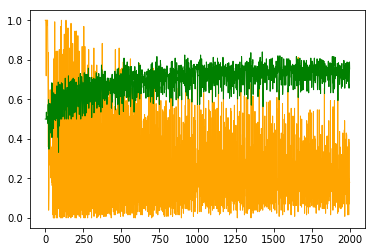

In [34]:
plt.plot(g_accs, color='orange', linewidth=1)
plt.plot(d_accs, color='green', linewidth=1)



In [30]:
for i in range(10):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

[0.34817725]
[0.45862654]
[0.9232486]
[0.47461298]
[0.30895877]
[0.21166903]
[0.88487977]
[0.56153405]
[0.5665859]
[0.44828114]


(28, 28, 1)


array([0.27551252], dtype=float32)

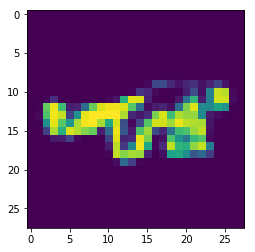

In [29]:
noise = np.random.uniform(-1, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [31]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))